#### <center> **LSTM (Dataset: Amazon and Cisco)**

#### **A. Eksplorasi dan Praproses Data**

- Eksplorasi data dan plotting
- Pemisahan data sesuai input dan output (window size dan horizon)
- Pemisahan data menjadi training, testing, dan validation set

- ##### **Eksplorasi dan plotting data**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_amazon = pd.read_csv("AMZN.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df_amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [3]:
df_cisco = pd.read_csv("CSCO.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df_cisco.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-02-16,0.0,0.079861,0.073785,0.077257,0.059806,940636800
1990-02-20,0.0,0.079861,0.074653,0.079861,0.061822,151862400
1990-02-21,0.0,0.078993,0.075521,0.078125,0.060478,70531200
1990-02-22,0.0,0.081597,0.078993,0.078993,0.061150,45216000
1990-02-23,0.0,0.079861,0.078125,0.078559,0.060814,44697600


In [4]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5758 entries, 1997-05-15 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5758 non-null   float64
 1   High       5758 non-null   float64
 2   Low        5758 non-null   float64
 3   Close      5758 non-null   float64
 4   Adj Close  5758 non-null   float64
 5   Volume     5758 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 314.9 KB


In [5]:
df_cisco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7589 entries, 1990-02-16 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7589 non-null   float64
 1   High       7589 non-null   float64
 2   Low        7589 non-null   float64
 3   Close      7589 non-null   float64
 4   Adj Close  7589 non-null   float64
 5   Volume     7589 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 415.0 KB


In [6]:
len(df_amazon)

5758

In [7]:
len(df_cisco)

7589

In [8]:
df_amazon = pd.DataFrame(df_amazon["Close"])
df_amazon.head()

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [9]:
df_cisco = pd.DataFrame(df_cisco["Close"])
df_cisco.head()

,Close
Date,
1990-02-16,0.077257
1990-02-20,0.079861
1990-02-21,0.078125
1990-02-22,0.078993
1990-02-23,0.078559


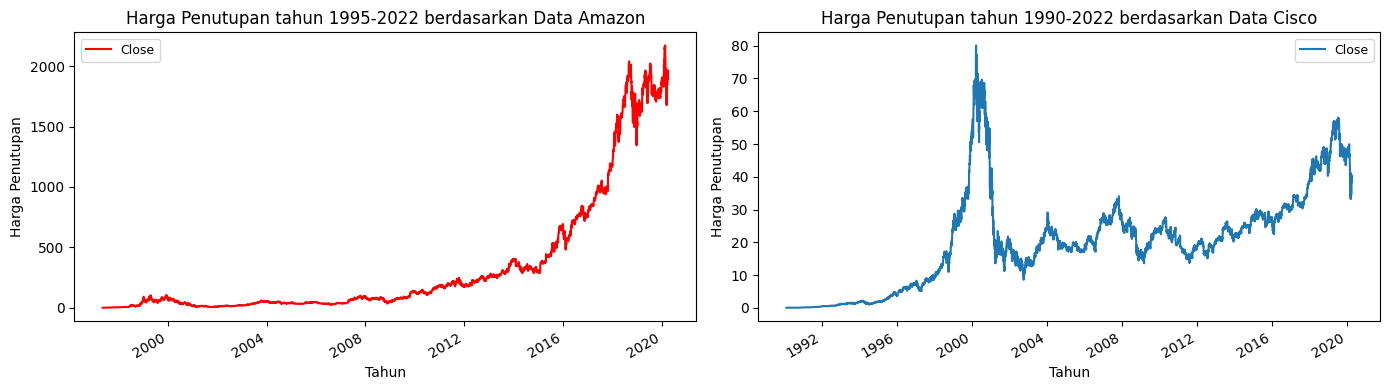

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

df_amazon.plot(ax=axes[0], legend=True, color='red')
axes[0].set_ylabel("Harga Penutupan")
axes[0].set_xlabel("Tahun")
axes[0].set_title("Harga Penutupan tahun 1995-2022 berdasarkan Data Amazon", fontsize=12)
axes[0].legend(fontsize=9)

df_cisco.plot(ax=axes[1], legend=True)
axes[1].set_ylabel("Harga Penutupan")
axes[1].set_xlabel("Tahun")
axes[1].set_title("Harga Penutupan tahun 1990-2022 berdasarkan Data Cisco", fontsize=12)
axes[1].legend(fontsize=9)

plt.tight_layout()
plt.show()

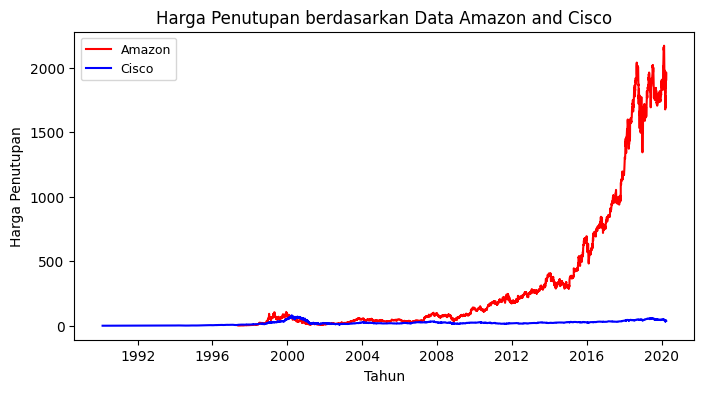

In [11]:
plt.figure(figsize=(8, 4))

plt.plot(df_amazon.index, df_amazon['Close'], color='red', label='Amazon')
plt.plot(df_cisco.index, df_cisco['Close'], color='blue', label='Cisco')

plt.xlabel("Tahun")
plt.ylabel("Harga Penutupan")
plt.title("Harga Penutupan berdasarkan Data Amazon and Cisco", fontsize=12)
plt.legend(fontsize=9)

plt.show()

- ##### **Pemisahan bagian window & horizon (window: 5, horizon: 1) atau input dan output**

In [12]:
window_size = 5
horizon = 1 

In [13]:
date_amazon = df_amazon.index.to_numpy()
close_amazon = df_amazon["Close"].to_numpy()

date_cisco = df_cisco.index.to_numpy()
close_cisco = df_cisco["Close"].to_numpy()

In [14]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [15]:
def make_windows(x, window_size=5, horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [16]:
# Amazon data
full_windows_amazon, full_labels_amazon = make_windows(close_amazon, window_size=window_size, horizon=horizon)
len(full_windows_amazon), len(full_labels_amazon)

(5753, 5753)

In [17]:
# Cisco data
full_windows_cisco, full_labels_cisco = make_windows(close_cisco, window_size=window_size, horizon=horizon)
len(full_windows_cisco), len(full_labels_cisco)

(7584, 7584)

In [18]:
# Amazon data
print('Amazon Data')
for i in range(3):
  print(f"Window: {full_windows_amazon[i]} -> Label: {full_labels_amazon[i]}")

print('\nCisco Data')
# Cisco data
for i in range(3):
  print(f"Window: {full_windows_cisco[i]} -> Label: {full_labels_cisco[i]}")

Amazon Data
Window: [1.95833337 1.72916663 1.70833337 1.63541663 1.42708337] -> Label: [1.39583337]
Window: [1.72916663 1.70833337 1.63541663 1.42708337 1.39583337] -> Label: [1.5]
Window: [1.70833337 1.63541663 1.42708337 1.39583337 1.5       ] -> Label: [1.58333337]

Cisco Data
Window: [0.07725695 0.07986111 0.078125   0.07899305 0.07855903] -> Label: [0.07638889]
Window: [0.07986111 0.078125   0.07899305 0.07855903 0.07638889] -> Label: [0.078125]
Window: [0.078125   0.07899305 0.07855903 0.07638889 0.078125  ] -> Label: [0.08072916]


- ##### **Pembagian data (train: 80, validation: 10, test: 10) dengan windowing**

In [19]:
def make_train_val_test_splits(windows, labels, val_split=0.1, test_split=0.1):
    test_size = int(len(windows) * test_split)
    val_size = int(len(windows) * val_split)
    train_size = len(windows) - val_size - test_size

    train_windows = windows[:train_size]
    val_windows = windows[train_size:train_size + val_size]
    test_windows = windows[train_size + val_size:]
    
    train_labels = labels[:train_size]
    val_labels = labels[train_size:train_size + val_size]
    test_labels = labels[train_size + val_size:]
    
    return train_windows, val_windows, test_windows, train_labels, val_labels, test_labels

In [20]:
# Amazon data
train_windows_amazon, val_windows_amazon, test_windows_amazon, train_labels_amazon, val_labels_amazon, test_labels_amazon = make_train_val_test_splits(full_windows_amazon, full_labels_amazon)

print("Amazon Data\n")
print(f"Full windows: {len(full_windows_amazon)}")
print(f"Full labels: {len(full_labels_amazon)}\n")
print(f"Training windows: {len(train_windows_amazon)}")
print(f"Training labels: {len(train_labels_amazon)}\n")
print(f"Testing windows: {len(test_windows_amazon)}")
print(f"Testing labels: {len(test_labels_amazon)}\n")
print(f"Validation windows: {len(val_windows_amazon)}")
print(f"Validation labels: {len(val_labels_amazon)}")

Amazon Data

Full windows: 5753
Full labels: 5753

Training windows: 4603
Training labels: 4603

Testing windows: 575
Testing labels: 575

Validation windows: 575
Validation labels: 575


In [21]:
# Cisco data
train_windows_cisco, val_windows_cisco, test_windows_cisco, train_labels_cisco, val_labels_cisco, test_labels_cisco = make_train_val_test_splits(full_windows_cisco, full_labels_cisco)

print("Cisco Data\n")
print(f"Full windows: {len(full_windows_cisco)}")
print(f"Full labels: {len(full_labels_cisco)}\n")
print(f"Training windows: {len(train_windows_cisco)}")
print(f"Training labels: {len(train_labels_cisco)}\n")
print(f"Testing windows: {len(test_windows_cisco)}")
print(f"Testing labels: {len(test_labels_cisco)}\n")
print(f"Validation windows: {len(val_windows_cisco)}")
print(f"Validation labels: {len(val_labels_cisco)}")

Cisco Data

Full windows: 7584
Full labels: 7584

Training windows: 6068
Training labels: 6068

Testing windows: 758
Testing labels: 758

Validation windows: 758
Validation labels: 758


In [22]:
# Amazon data
train_windows_amazon[:5], train_labels_amazon[:5]

(array([[1.95833337, 1.72916663, 1.70833337, 1.63541663, 1.42708337],
        [1.72916663, 1.70833337, 1.63541663, 1.42708337, 1.39583337],
        [1.70833337, 1.63541663, 1.42708337, 1.39583337, 1.5       ],
        [1.63541663, 1.42708337, 1.39583337, 1.5       , 1.58333337],
        [1.42708337, 1.39583337, 1.5       , 1.58333337, 1.53125   ]]),
 array([[1.39583337],
        [1.5       ],
        [1.58333337],
        [1.53125   ],
        [1.50520837]]))

In [23]:
# Cisco data
train_windows_cisco[:5], train_labels_cisco[:5]

(array([[0.07725695, 0.07986111, 0.078125  , 0.07899305, 0.07855903],
        [0.07986111, 0.078125  , 0.07899305, 0.07855903, 0.07638889],
        [0.078125  , 0.07899305, 0.07855903, 0.07638889, 0.078125  ],
        [0.07899305, 0.07855903, 0.07638889, 0.078125  , 0.08072916],
        [0.07855903, 0.07638889, 0.078125  , 0.08072916, 0.07986111]]),
 array([[0.07638889],
        [0.078125  ],
        [0.08072916],
        [0.07986111],
        [0.08072916]]))

- ##### **Pembagian data tanpa windowing**

> Digunakan untuk mengecek apakah array dari data sama untuk splitting data dengan windowing maupun tanpa windowing

In [24]:
train_proportion = 0.8
val_proportion = 0.1
test_proportion = 0.1

# Amazon data
train_split_amazon = int(train_proportion * len(close_amazon))
val_split_amazon = int((train_proportion + val_proportion) * len(close_amazon))

X_train_amazon, y_train_amazon = date_amazon[:train_split_amazon], close_amazon[:train_split_amazon]
X_val_amazon, y_val_amazon = date_amazon[train_split_amazon:val_split_amazon], close_amazon[train_split_amazon:val_split_amazon]
X_test_amazon, y_test_amazon = date_amazon[val_split_amazon:], close_amazon[val_split_amazon:]

# Cisco data
train_split_cisco = int(train_proportion * len(close_cisco))
val_split_cisco = int((train_proportion + val_proportion) * len(close_cisco))

X_train_cisco, y_train_cisco = date_cisco[:train_split_cisco], close_cisco[:train_split_cisco]
X_val_cisco, y_val_cisco = date_cisco[train_split_cisco:val_split_cisco], close_cisco[train_split_cisco:val_split_cisco]
X_test_cisco, y_test_cisco = date_cisco[val_split_cisco:], close_cisco[val_split_cisco:]

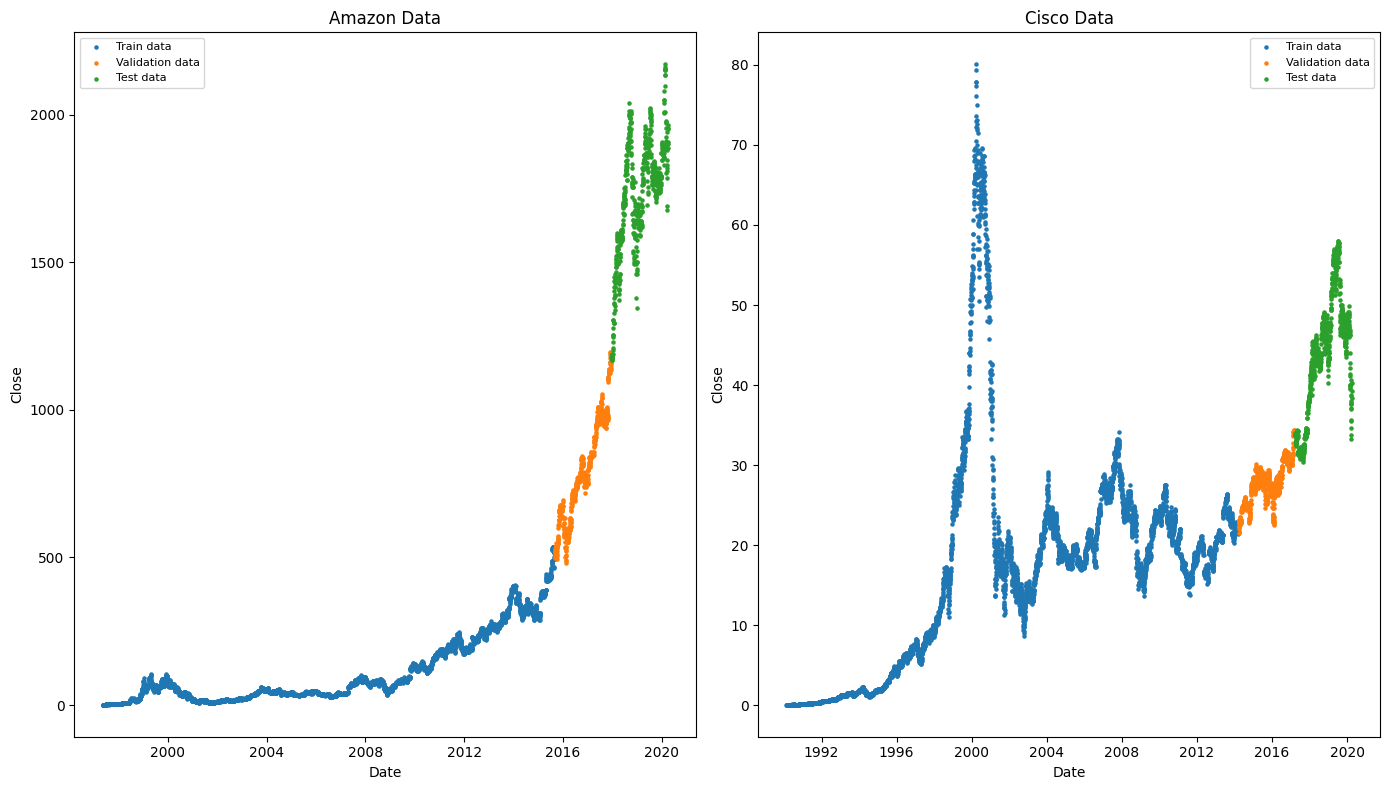

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))  

ax1.scatter(X_train_amazon, y_train_amazon, s=5, label="Train data")
ax1.scatter(X_val_amazon, y_val_amazon, s=5, label="Validation data")
ax1.scatter(X_test_amazon, y_test_amazon, s=5, label="Test data")
ax1.set_xlabel("Date")
ax1.set_ylabel("Close")
ax1.set_title("Amazon Data")
ax1.legend(fontsize=8)

ax2.scatter(X_train_cisco, y_train_cisco, s=5, label="Train data")
ax2.scatter(X_val_cisco, y_val_cisco, s=5, label="Validation data")
ax2.scatter(X_test_cisco, y_test_cisco, s=5, label="Test data")
ax2.set_xlabel("Date")
ax2.set_ylabel("Close")
ax2.set_title("Cisco Data")
ax2.legend(fontsize=8)

plt.tight_layout()
plt.show()

In [26]:
# Cek apakah array berdimensi sama untuk splitting data dengan windowing & tanpa windowing

# Amazon data
np.array_equal(np.squeeze(train_labels_amazon[:-horizon-1]), y_train_amazon[window_size:])

True

In [27]:
# Cisco data
np.array_equal(np.squeeze(train_labels_cisco[:-horizon-1]), y_train_cisco[window_size:])

True

> Berdasarkan hasil kedua code di atas, array sudah berukuran sama. Hal ini menandakan splitting dengan windowing sudah sesuai.

In [28]:
# Amazon data
print('Amazon data')
print(np.squeeze(train_labels_amazon[:-horizon-1]))
print(y_train_amazon[window_size:])
print("\n")

# Cisco data
print('Cisco data')
print(np.squeeze(train_labels_cisco[:-horizon-1]))
print(y_train_cisco[window_size:])

Amazon data
[  1.39583337   1.5          1.58333337 ... 512.89001465 496.54000854
 510.54998779]
[  1.39583337   1.5          1.58333337 ... 512.89001465 496.54000854
 510.54998779]


Cisco data
[ 0.07638889  0.078125    0.08072916 ... 21.62999916 21.82999992
 21.63999939]
[ 0.07638889  0.078125    0.08072916 ... 21.62999916 21.82999992
 21.63999939]


#### **B. Arsitektur Baseline dengan LSTM**

- Pemodelan dengan baseline unit = 50, layer akhir (node perceptron) unit = 1, dan activation function = RelU
- Melakukan prediksi dan evaluasi pada arsitektur/model 1

In [29]:
import tensorflow as tf
from tensorflow.keras import layers

/Users/patriciapepita/Documents/4th Semester/Deep Learning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [30]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    
    filepath = os.path.join(save_path, model_name + ".keras")
    return tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                              verbose=0,
                                              save_best_only=True)

In [31]:
# class MyPreprocessingLayer(layers.Layer):
#     def call(self, inputs):
#         # Perform your preprocessing here
#         expanded_inputs = tf.expand_dims(inputs, axis=-1)
#         # Other preprocessing steps if needed
#         return expanded_inputs

In [32]:
# # Amazon data

# tf.random.set_seed(42)

# inputs = layers.Input(shape=(window_size,))
# x = MyPreprocessingLayer()(inputs) # expand input dimension to be compatible with LSTM
# x = layers.LSTM(50, activation="relu")(x) # using the tanh loss function results in a massive error

# output = layers.Dense(horizon)(x)
# lstm_model_amazon = tf.keras.Model(inputs=inputs, outputs=output, name="lstm_model_amazon")

# lstm_model_amazon = lstm_model_amazon.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())

# model_fit = lstm_model_amazon.fit(train_windows_amazon,
#             train_labels_amazon,
#             epochs=100,
#             verbose=1,
#             batch_size=128,
#             validation_data=(val_windows_amazon, val_labels_amazon),
#             callbacks=[create_model_checkpoint(model_name=lstm_model_amazon.name)])

- ##### **Pemodelan serta melihat training dan validation loss**

In [33]:
# Amazon data
tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(50, activation="relu")(x)

output = layers.Dense(horizon)(x)
lstm_model_amazon = tf.keras.Model(inputs=inputs, outputs=output, name="lstm_model_amazon")

lstm_model_amazon.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_fit = lstm_model_amazon.fit(train_windows_amazon,
            train_labels_amazon,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_amazon, val_labels_amazon),
            callbacks=[create_model_checkpoint(model_name=lstm_model_amazon.name)])

Epoch 1/100


2024-07-07 08:33:18.449610: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-07 08:33:18.449629: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-07 08:33:18.449632: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-07 08:33:18.449664: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-07 08:33:18.449676: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-07 08:33:18.921957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 97.1269 - val_loss: 107.2608
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.4374 - val_loss: 18.0342
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5050 - val_loss: 14.1244
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.2444 - val_loss: 13.9081
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1964 - val_loss: 13.9798
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1649 - val_loss: 13.8519
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.1190 - val_loss: 13.5926
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.9483 - val_loss: 13.5083
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.0219 - val_loss: 13.3690
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.8445 - val_loss: 12.9115
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7574 - val_loss: 12.1903
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/ste

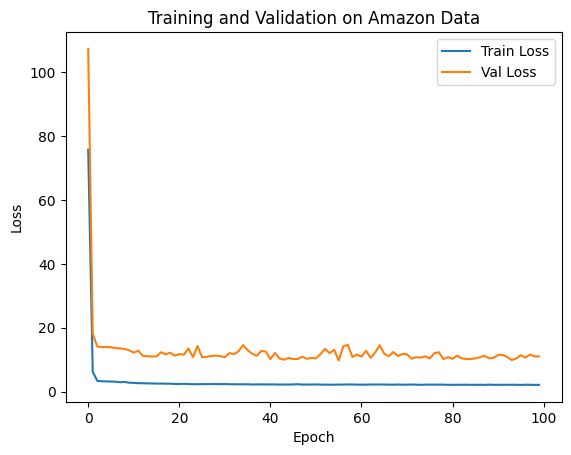

In [34]:
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and Validation on Amazon Data')
plt.legend()
plt.show()

> Validation dan training menunjukkan initial loss yang tinggi dan kemudian turun sangat tajam ke value loss dari training data hampir 0. Hal ini menunjukkan bahwa model hampir fit dan konvergen dengan data training.  

> Gap antara validation dan training hanya kecil dan value loss nya rendah. Namun, validation loss sedikit lebih tinggi daripada training sehingga adanya indikasi sedikit underfit pada model.

In [35]:
# # Cisco data

# lstm_model_cisco = tf.keras.Model(inputs=inputs, outputs=output, name="lstm_model_cisco")

# lstm_model_cisco.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())

# model_fit = lstm_model_cisco.fit(train_windows_cisco,
#             train_labels_cisco,
#             epochs=100,
#             verbose=0,
#             batch_size=128,
#             validation_data=(val_windows_cisco, val_labels_cisco),
#             callbacks=[create_model_checkpoint(model_name=lstm_model_cisco.name)])

In [36]:
# Cisco data
tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(50, activation="relu")(x)

output = layers.Dense(horizon)(x)
lstm_model_cisco = tf.keras.Model(inputs=inputs, outputs=output, name="lstm_model_cisco")

lstm_model_cisco.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_fit = lstm_model_cisco.fit(train_windows_cisco,
            train_labels_cisco,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_cisco, val_labels_cisco),
            callbacks=[create_model_checkpoint(model_name=lstm_model_cisco.name)])

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 14.1461 - val_loss: 2.5979
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.0414 - val_loss: 0.3716
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5980 - val_loss: 0.3657
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5594 - val_loss: 0.3657
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5303 - val_loss: 0.3625
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.5105 - val_loss: 0.3610
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4914 - val_loss: 0.3547
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4714 - val_loss: 0.3414
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4536 - val_loss: 0.3248
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4370 - val_loss: 0.3172
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4073 - val_loss: 0.3282
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/ste

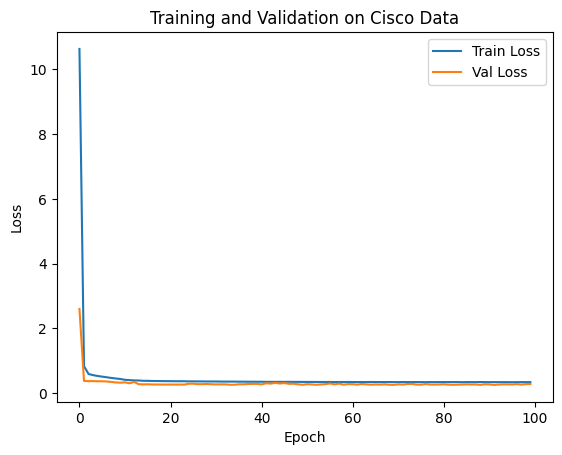

In [37]:
# Cisco data
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and Validation on Cisco Data')
plt.legend()
plt.show()

> Validation dan training menunjukkan initial loss yang tidak setinggi pada Amazon data dan kemudian turun tajam ke value loss dari training & validation data hampir 0. Hal ini menunjukkan bahwa model sudah konvergen. Model dapat dengan cepat melihat pattern dari data pada epoch awal.

> Hampir tidak ada gap antara validation dan training dengan nilai loss yang rendah. Hal ini menunjukkan bahwa model sudah fit dengan training dan validation data.

- ##### **Membuat prediksi**

In [38]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [39]:
# Amazon data
lstm_pred_amazon = make_preds(lstm_model_amazon, test_windows_amazon)
lstm_pred_amazon[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1168.8516, 1174.6426, 1179.3916, 1179.7107, 1178.2666, 1173.3096,
       1172.3298, 1174.0012, 1176.0043, 1174.5797], dtype=float32)>

In [40]:
# Cisco data
lstm_pred_cisco = make_preds(lstm_model_cisco, test_windows_cisco)
lstm_pred_cisco[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.92293 , 33.672245, 33.663013, 33.692596, 33.496758, 33.348034,
       32.969463, 33.00034 , 32.860653, 32.9042  ], dtype=float32)>

> Hasil menunjukkan 10 prediksi pertama melalui prediksi pada data testing menggunakan model LSTM.

- ##### **Membuat prediksi masa depan**

In [41]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Year")
  plt.ylabel("Close Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

In [42]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=window_size) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-window_size:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-window_size:]

  return future_forecast

In [43]:
INTO_FUTURE = 365
future_forecast = make_future_forecast(values=close_amazon,
                                       model=lstm_model_amazon,
                                       into_future=INTO_FUTURE,
                                       window_size=window_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicting on: 
 [1955.48999023 1900.09997559 1963.94995117 1949.7199707  1907.69995117] -> Prediction: 1923.27783203125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicting on: 
 [1900.09997559 1963.94995117 1949.7199707  1907.69995117 1923.27783203] -> Prediction: 1916.168701171875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicting on: 
 [1963.94995117 1949.7199707  1907.69995117 1923.27783203 1916.16870117] -> Prediction: 1922.8021240234375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicting on: 
 [1949.7199707  1907.69995117 1923.27783203 1916.16870117 1922.80212402] -> Prediction: 1915.17236328125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicting on: 
 [1907.69995117 1923.27783203 1916.16870117 1922.80212402 1915.17236328] -> Prediction: 1914.574951171875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicting on: 
 [1923.27783203 1916.16870117 1922.80212402 1915.17236328 1914.57495117] -> Prediction: 1913.09521484375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/ste

In [44]:
future_forecast[:10]

[1923.2778,
 1916.1687,
 1922.8021,
 1915.1724,
 1914.575,
 1913.0952,
 1912.4481,
 1910.2664,
 1908.6293,
 1907.1614]

In [45]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [46]:
last_timestep = df_amazon.index[-1]
last_timestep

Timestamp('2020-04-01 00:00:00')

In [47]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
       '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
       '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
       '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
       '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
       '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
       '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
       '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31',
       '2020-06-01', '2020-06-02', '2020-06-03', '2020-

In [48]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, close_amazon[-1])
next_time_steps, future_forecast

(array(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
        '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
        '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
        '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
        '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
        '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
        '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
        '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
        '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
        '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
        '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
        '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
        '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
        '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
        '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
        '2020-05-31', '2020-06-01', '202

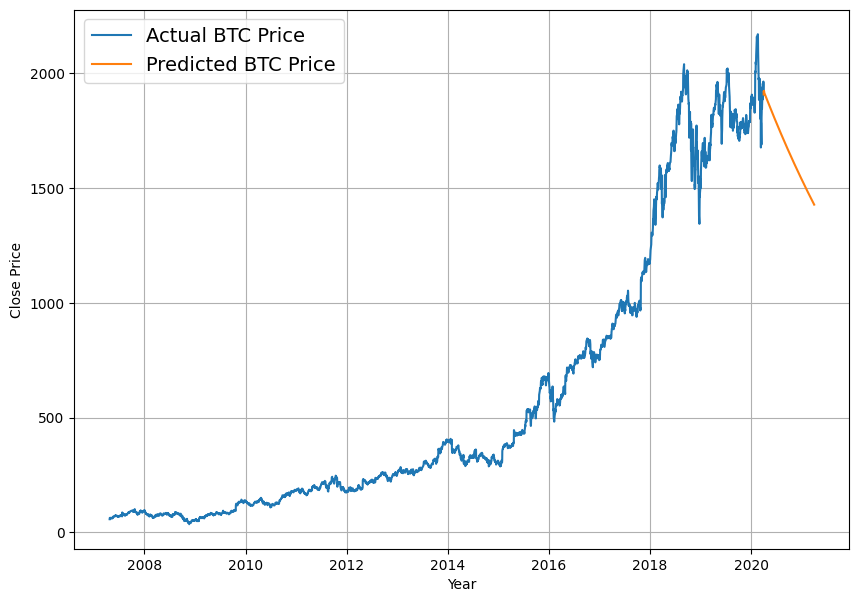

In [49]:
plt.figure(figsize=(10, 7))
plot_time_series(df_amazon.index, close_amazon, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [50]:
# Cisco data
future_forecast = make_future_forecast(values=close_cisco,
                                       model=lstm_model_cisco,
                                       into_future=INTO_FUTURE,
                                       window_size=window_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicting on: 
 [40.58000183 38.81999969 40.31999969 39.31000137 38.33000183] -> Prediction: 38.48046875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicting on: 
 [38.81999969 40.31999969 39.31000137 38.33000183 38.48046875] -> Prediction: 38.50107955932617

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicting on: 
 [40.31999969 39.31000137 38.33000183 38.48046875 38.50107956] -> Prediction: 38.41556930541992

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicting on: 
 [39.31000137 38.33000183 38.48046875 38.50107956 38.41556931] -> Prediction: 38.34339141845703

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicting on: 
 [38.33000183 38.48046875 38.50107956 38.41556931 38.34339142] -> Prediction: 38.280548095703125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicting on: 
 [38.48046875 38.50107956 38.41556931 38.34339142 38.2805481 ] -> Prediction: 38.21744155883789

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicting on: 
 [38.50107956 38.41556931 38.34339142 38.2805

In [51]:
last_timestep = df_cisco.index[-1]
last_timestep

Timestamp('2020-04-01 00:00:00')

In [52]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
       '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
       '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
       '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
       '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
       '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
       '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
       '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31',
       '2020-06-01', '2020-06-02', '2020-06-03', '2020-

In [53]:
# Insert last timestep/close price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, close_amazon[-1])
next_time_steps, future_forecast

(array(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
        '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
        '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
        '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
        '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
        '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
        '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
        '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
        '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
        '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
        '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
        '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
        '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
        '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
        '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
        '2020-05-31', '2020-06-01', '202

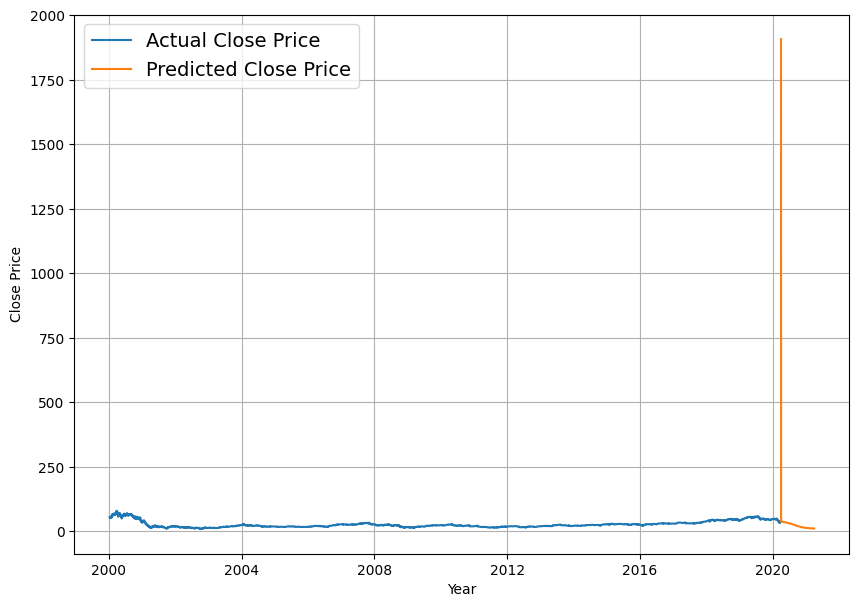

In [54]:
plt.figure(figsize=(10, 7))
plot_time_series(df_cisco.index, close_cisco, start=2500, format="-", label="Actual Close Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted Close Price")

#### **C. Evaluasi Model 1 dan Modifikasi**

- Evaluasi model 1 (LSTM base architecture with 50 units input) dengan MAE, MSE, RMSE, dan MAPE
- Melihat plot fitting dari model
- Performa model 1 pada kedua dataset
- Modifikasi arsitektur

- ##### **Evaluasi model 1 untuk melihat performa model**

> Nilai MAE, MSEm dan RMSE menunjukkan skala error, sedangkan MAPE menunjukkan persentase error. Semakin rendah nilai tersebut, semakin baik performa model.

In [55]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Initialize metric objects
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

    # Update the state of the metrics
    mae_metric.update_state(y_true, y_pred)
    mse_metric.update_state(y_true, y_pred)
    mape_metric.update_state(y_true, y_pred)

    # Calculate various metrics
    mae = mae_metric.result().numpy()
    mse = mse_metric.result().numpy()
    rmse = tf.sqrt(mse_metric.result()).numpy()
    mape = mape_metric.result().numpy()

    return {"mae": mae,
            "mse": mse,
            "rmse": rmse,
            "mape": mape}

In [56]:
# Amazon data
lstm_eval_amazon = evaluate_preds(y_true=tf.squeeze(test_labels_amazon), y_pred=lstm_pred_amazon)
print('Model evaluation on Amazon data')
print(lstm_eval_amazon)

print(f"\nAverage close price dalam dataset: ", tf.reduce_mean(y_test_amazon).numpy())

Model evaluation on Amazon data
{'mae': 30.2593, 'mse': 1694.9604, 'rmse': 41.1699, 'mape': 1.7680333}

Average close price dalam dataset:  1730.3233150906033


> Secara keseluruhan, performa model sudah cukup baik mengingat nilai MAE, MSE, RMSE, dan MAPE sudah rendah.

> 'Average close price dalam dataset' digunakan untuk membandingan nilai MAE dengan nilai asli rata-rata close price pada test data. MAE 33.179 menunjukkan bahwa terdapat perbedaan sebesar 33.179 (rata-rata) pada prediksi dengan test data. Perbedaan ini tidak terlalu signifikan, tetapi dapat lebih baik.

In [57]:
# Cisco data

lstm_eval_cisco = evaluate_preds(y_true=tf.squeeze(test_labels_cisco), y_pred=lstm_pred_cisco)
print('Model evaluation on Cisco data')
print(lstm_eval_cisco)

print(f"\nAverage close price dalam dataset: ", tf.reduce_mean(y_test_cisco).numpy())

Model evaluation on Cisco data
{'mae': 0.5309656, 'mse': 0.60811496, 'rmse': 0.7798173, 'mape': 1.2217801}

Average close price dalam dataset:  43.53859022640585


> Secara keseluruhan, performa model sudah sangat baik mengingat nilai MAE, MSE, RMSE, dan MAPE sudah sangat rendah (mendekati 0).

> 'Average close price dalam dataset' digunakan untuk membandingan nilai MAE dengan nilai asli rata-rata close price pada test data. MAE 0.511 menunjukkan bahwa terdapat perbedaan sebesar 0.5112 (rata-rata) pada prediksi dengan test data. Perbedaan ini tergolong sangat kecil karena hampir 0.

- ##### **Plotting model untuk komparasi antara prediksi dengan data aslinya**

In [58]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Close Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

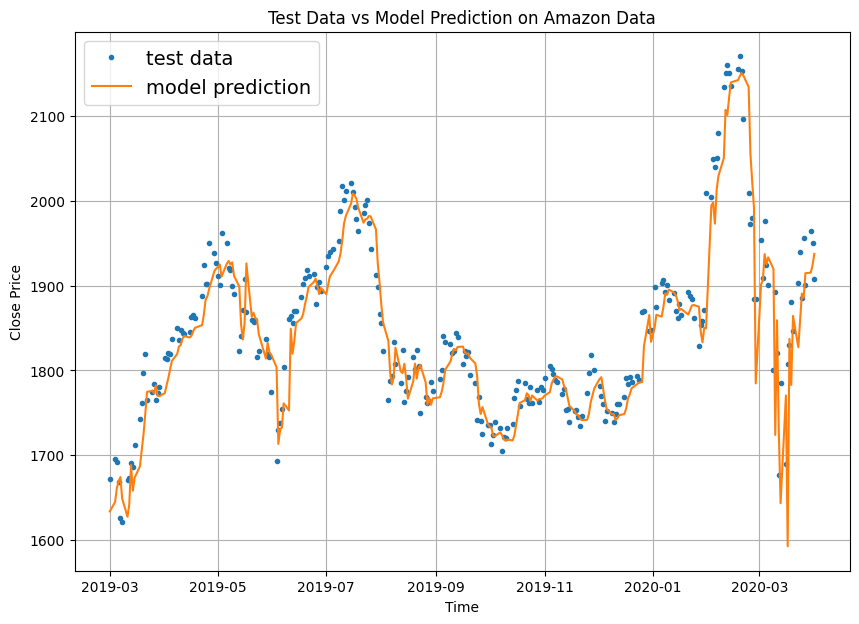

In [59]:
# Amazon data
offset = 300
plt.figure(figsize=(10, 7))
plt.title('Test Data vs Model Prediction on Amazon Data')
plot_time_series(timesteps=X_test_amazon[-len(test_windows_amazon):], values=test_labels_amazon[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test_amazon[-len(test_windows_amazon):], values=lstm_pred_amazon, start=offset, format="-", label="model prediction")

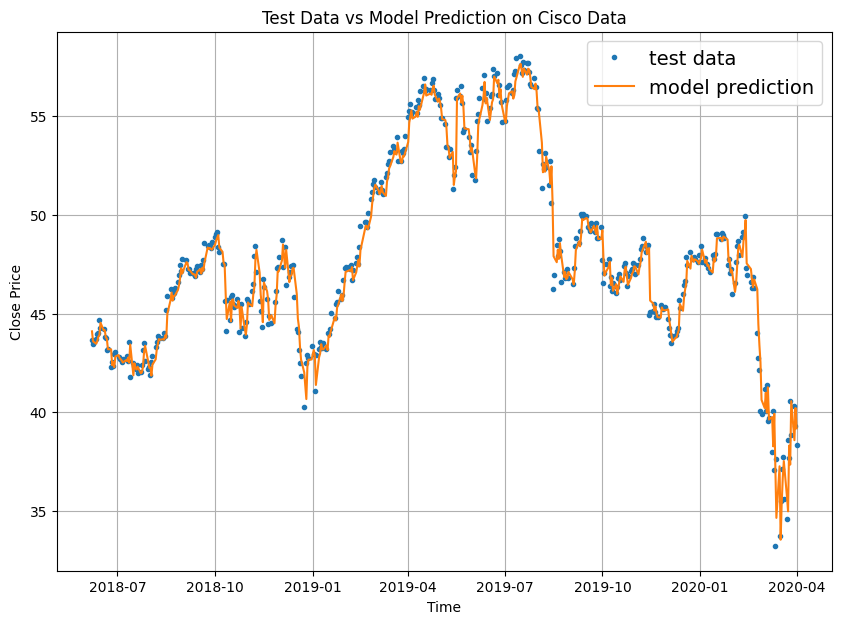

In [60]:
# Cisco data
offset = 300
plt.figure(figsize=(10, 7))
plt.title('Test Data vs Model Prediction on Cisco Data')
plot_time_series(timesteps=X_test_cisco[-len(test_windows_cisco):], values=test_labels_cisco[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test_cisco[-len(test_windows_cisco):], values=lstm_pred_cisco, start=offset, format="-", label="model prediction")

> Plotting data mendukung hasil dari evaluasi model. Dapat dilihat bahwa prediksi pada Cisco data lebih mendekati test data dibandingkan prediksi pada Amazon data.

- ##### **Performa arsitektur model 1 pada kedua dataset**

> Arsitektur model 1 memiliki performa, hasil prediksi, dan evaluasi yang lebih baik pada Cisco dataset dibandingkan dengan Amazon dataset.

- ##### **Modifikasi arsitektur model**

> Melihat hasil plotting validation dan training loss serta hasil evaluasi, model terindikasi sebagai berikut:

>> Pada Amazon dataset, terdapat indikasi underfit karena hasil validation yang lebih tinggi dan terdapat gap dengan training data. Oleh karena itu, model akan dibuat lebih canggih dengan menambah neurons.

>> Pada Cisco dataset,

In [61]:
# Amazon data
tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(200, activation="relu")(x)

output = layers.Dense(horizon)(x)
lstm_model_amazon = tf.keras.Model(inputs=inputs, outputs=output, name="lstm_model_amazon")

lstm_model_amazon.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_fit = lstm_model_amazon.fit(train_windows_amazon,
            train_labels_amazon,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_amazon, val_labels_amazon),
            callbacks=[create_model_checkpoint(model_name=lstm_model_amazon.name)])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 78.5397 - val_loss: 19.6059
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.4147 - val_loss: 14.4666
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0999 - val_loss: 13.6040
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0357 - val_loss: 17.9851
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9374 - val_loss: 19.8289
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6645 - val_loss: 12.4403
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.5756 - val_loss: 14.2849
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5314 - val_loss: 10.1716
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3621 - val_loss: 11.4968
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3014 - val_loss: 10.7198
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2596 - val_loss: 12.6616
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 

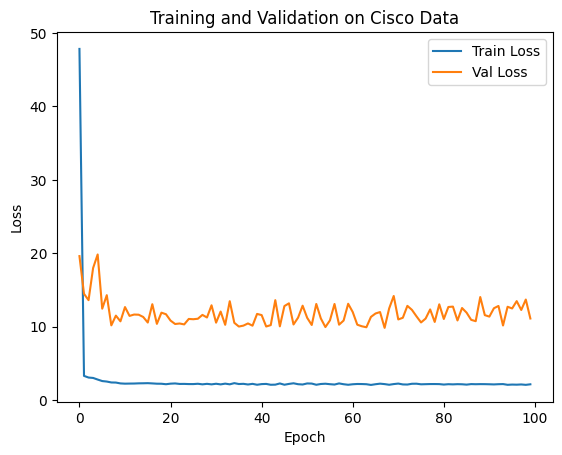

In [62]:
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and Validation on Cisco Data')
plt.legend()
plt.show()

#### **D. Evaluasi Model 2**